# Importar las librerias necesarias

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

# Cargar el dataset

In [6]:
df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [7]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Descripcion del dataset

* Rank: Rank of the person according to their wealth.
* Name: Name of the billionaires.
* Networth: The Net worth in all the forms included (in US Billion dollars).
* Age: Age of the person.
* Country: Country or Region, the billionaires belongs to.
* Source: The immediate source of their wealth (their company).
* Industry: Industry they are into.

In [8]:
df.shape

(2640, 35)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [10]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [11]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [12]:
df.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

# Organizacion de Datos

Cambiar el indice segun el rango

Comentado porque hay rangos que se repiten. Y al haber indices repetidos da error

In [13]:
# df = df.set_index("rank")

Verificar si se repiten millonarios

Eliminar 65 valores na de edad no representativos

In [14]:
df = df.dropna(subset=["age"])

Organization no sirve pq solo tiene 295 valores unicos de un df de 2640 filas

In [15]:
print(df[["category", "source"]])
print(df["organization"].unique().size)

                   category                        source
0          Fashion & Retail                          LVMH
1                Automotive                 Tesla, SpaceX
2                Technology                        Amazon
3                Technology                        Oracle
4     Finance & Investments            Berkshire Hathaway
...                     ...                           ...
2635             Healthcare                Health clinics
2636        Food & Beverage                          Beer
2637          Manufacturing  Tyre manufacturing machinery
2638            Real Estate                   Real estate
2639            Diversified                   Diversified

[2575 rows x 2 columns]
294


Agregar la columna "CODE" con codigos ISO de paises

In [16]:
df = df.assign(**{"CODE" : df['country']})

In [17]:
def convertirACode(pais):
  if pais == "France":
    return "FRA"
  elif pais == "United States":
    return "USA"
  elif pais == "Mexico":
    return "MEX"
  elif pais == "India":
    return "IND"
  elif pais == "Spain":
    return "ESP"
  elif pais == "China":
    return "CHN"
  elif pais == "Canada":
    return "CDN"
  elif pais == "Germany":
    return "DEU"
  elif pais == 'Switzerland':
    return "CHE"
  elif pais == 'Belgium':
    return "BEL"
  elif pais == 'Hong Kong':
    return "HKG"
  elif pais == 'Austria':
    return "AUT"
  elif pais == 'Japan':
    return "JPN"
  elif pais == 'United Kingdom':
    return "GBR"
  elif pais == 'Australia':
    return "AUS"
  elif pais == 'Indonesia':
    return "IDN"
  elif pais == 'United Arab Emirates':
    return "ARE"
  elif pais == 'Russia':
    return "RUS"
  elif pais == 'Chile':
    return "CHL"
  elif pais == 'Monaco':
    return "MCO"
  elif pais == 'Czech Republic':
    return "CZE"
  elif pais == 'Sweden':
    return "SWE"
  elif pais == 'Thailand':
    return "THA"
  elif pais == 'Uzbekistan':
    return "UZB"
"""
       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',
       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',
       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',
       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',
       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',
       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',
       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',
       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',
       'Uruguay', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',
       'Bahrain', 'Peru', 'Andorra', 'Armenia'
"""

"\n       'Singapore', 'Nigeria', 'Israel', 'Italy', 'South Africa',\n       'Brazil', 'Malaysia', 'South Korea', 'New Zealand', 'Philippines',\n       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Eswatini (Swaziland)',\n       'Colombia', 'Netherlands', 'Poland', 'Bahamas', 'Ukraine',\n       'Cayman Islands', 'Greece', 'Turkey', 'Argentina', 'Georgia',\n       'Portugal', 'Kazakhstan', 'Algeria', 'Vietnam', 'Latvia',\n       'Finland', 'Bermuda', 'Luxembourg', 'British Virgin Islands',\n       'Cambodia', 'Lebanon', 'Oman', 'Ireland', 'Cyprus', 'Guernsey',\n       'Liechtenstein', 'Turks and Caicos Islands', 'Romania', 'Qatar',\n       'Uruguay', 'Nepal', 'Slovakia', 'Morocco', 'Hungary', 'Tanzania',\n       'Bahrain', 'Peru', 'Andorra', 'Armenia'\n"

In [18]:
df["CODE"] = df["CODE"].apply(convertirACode)
# df[["finalWorth", "CODE"]]

Conversion de datos de la columna "gdp_country"

In [19]:
def fix_price(price):
    if isinstance(price, str):
        if "$" in price:
            price = price[1:]
        price = price.strip()
        price = float(price.replace(",", ""))
    return price


In [20]:
df["gdp_country"] = df["gdp_country"].apply(fix_price)
# pd.options.display.float_format = '{:.2f}'.format

# Introduccion a la Exploracion

Ideas:
* analizar por apellido para ver corroborar lazos familiares
* predecir el genero con datos sobre el billonario

Objetivos:
* Se explora siguiendo 5 hipotesis

Puntos clave:
* Pregunta binaria: es un outlier o no?
* H1: filtrar outliers antes de hacer la regresion, probar graficar scatter plot con escala logaritmica en el axis y
* Sacar relacion primero y despues descartar. si sale mas de 0.5 hacer regresion lineal y despues descartar.
* 1. Filtro por outlayers
* 2. Aplicar escala logaritmica al axis solo si hay mucha densidad de datos;
* 3. Rescalar los datos. con la escala logaritmica
* 4. Sacar la correlacion entre las variables y ver si es mayor a 0.5
* 5. Si es mayor a 0.5 hacer la grafica de la regresion lineal.
* Solo scatterplots y lineas. no barras
* Poner topes para solo coger los valores pequenos
* H3: hacer tambien un grafico de barras horizontal
* H4: por hacer
* H5: analisis por grupo de valores. Investigar como interpretar los valores de gdp
* imputacion y prunning

# EDA

## Previo - Filtrar Outliers


<Figure size 800x600 with 0 Axes>

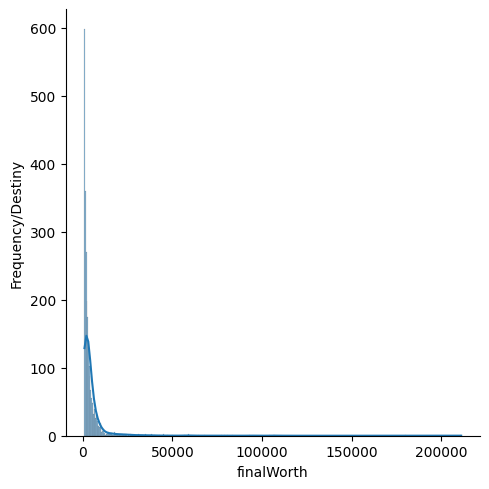

In [21]:
plt.figure(figsize=(8, 6))
scatter = sns.displot(data=df, x='finalWorth', kde=True)

scatter.set_axis_labels('finalWorth', 'Frequency/Destiny')

scatter.set_titles('Distribution Plot of Values')

# Show the plot
plt.show()

Yes, you can use quantiles to identify and potentially remove outliers from your data. The interquartile range (IQR) is often used for this purpose. The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Outliers are typically defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Here's an example in Python using pandas to identify and remove outliers based on the IQR:

<Figure size 800x600 with 0 Axes>

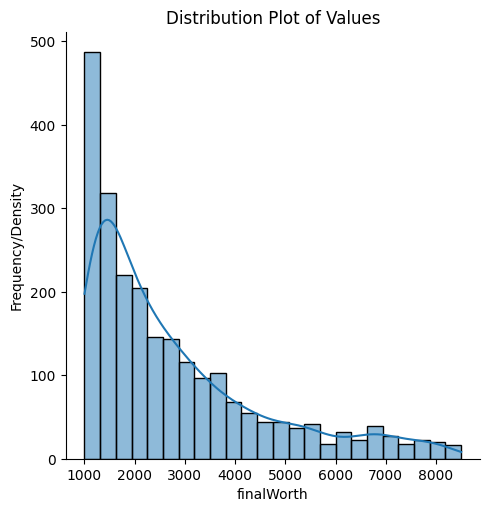

In [22]:
# Calculate Q1 and Q3
Q1 = df['finalWorth'].quantile(0.25)
Q3 = df['finalWorth'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['finalWorth'] >= lower_bound) & (df['finalWorth'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.displot(data=filtered_df, x='finalWorth', kde=True)

# Add labels and title
plt.xlabel("finalWorth")
plt.ylabel('Frequency/Density')
plt.title('Distribution Plot of Values')

# Show the plot
plt.show()

## Hipotesis 1

H1: ¿Existe una correlación positiva entre la edad de los multimillonarios y su riqueza final? Esta hipótesis examinaría si los multimillonarios tienden a acumular más riqueza a medida que envejecen.
Observaciones: descartar posibilidad de que sea por otras 3 variables
Data:
Visualización: scatter plot – línea de regresión lineal (no usar machine learning)


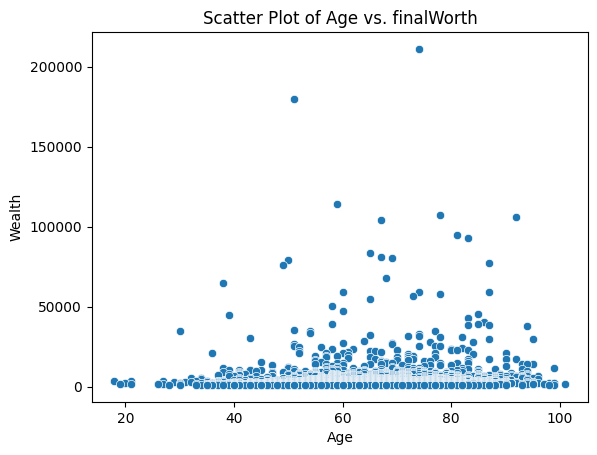

In [23]:
# Create a scatter plot using Seaborn
sns.scatterplot(data=df, x='age', y='finalWorth')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Wealth')
plt.title('Scatter Plot of Age vs. finalWorth')

# Display the plot
plt.show()

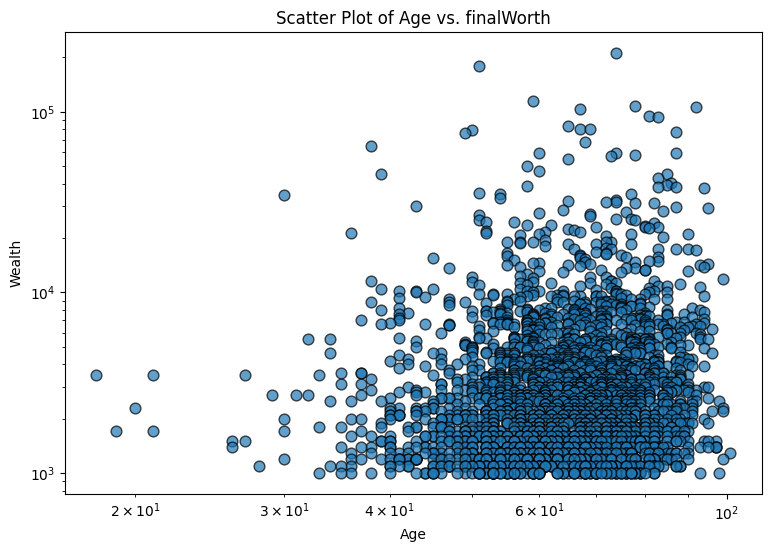

In [24]:
# Create a new figure and axis for Matplotlib
fig, ax = plt.subplots(figsize=(9, 6))

# Scatter plot using Matplotlib
ax.scatter(df['age'], df['finalWorth'], s=60, alpha=0.7, edgecolors="k")

# Set logarithmic scale on both variables in Matplotlib
ax.set_xscale("log")
ax.set_yscale("log")

# Set labels and title using Matplotlib
ax.set_xlabel('Age')
ax.set_ylabel('Wealth')
ax.set_title('Scatter Plot of Age vs. finalWorth')

# Show the Matplotlib plot
plt.show()

Otra forma de calcular outliers que al final no utilizo

In [25]:
# Calculate z-scores for the "finalWorth" column
z_scores = stats.zscore(df['finalWorth'])

# Set a threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = -3

# Create a boolean mask to identify outliers in the "finalWorth" column
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Display the indices of outliers
outliers_indices = df.index[outliers_mask]
print("\nIndices of outliers:")
print(outliers_indices)

# Remove rows containing outliers in the "finalWorth" column
df_no_outliers = df.drop(index=outliers_indices)


Indices of outliers:
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639],
      dtype='int64', length=2575)


Escala logaritmica

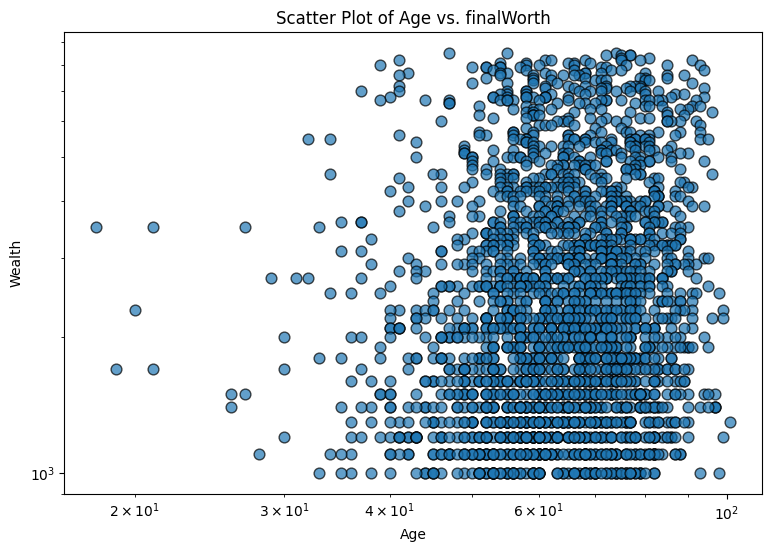

In [26]:
# Create a new figure and axis for Matplotlib
fig, ax = plt.subplots(figsize=(9, 6))

# Scatter plot using Matplotlib
ax.scatter(filtered_df['age'], filtered_df['finalWorth'], s=60, alpha=0.7, edgecolors="k")

# Set logarithmic scale on both variables in Matplotlib
ax.set_xscale("log")
ax.set_yscale("log")

# Set labels and title using Matplotlib
ax.set_xlabel('Age')
ax.set_ylabel('Wealth')
ax.set_title('Scatter Plot of Age vs. finalWorth')

# Show the Matplotlib plot
plt.show()

Utilizar .sample() para reducir el df. Que cantidad se considera una muestra significativa

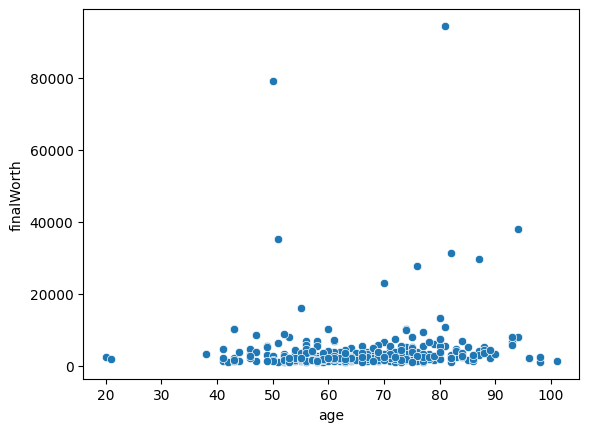

In [27]:
df_sample = df.sample(300)
sns.scatterplot(data=df_sample, x="age", y="finalWorth")
plt.show()

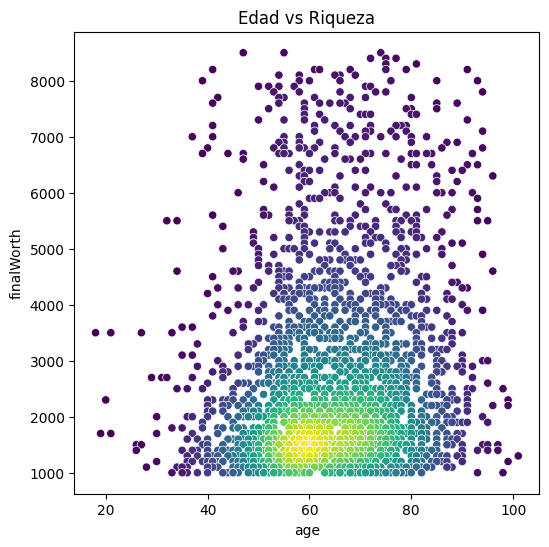

In [28]:
# Create a scatter plot with a density overlay
values = np.vstack([filtered_df["age"], filtered_df["finalWorth"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
scatter = sns.scatterplot(
    data=filtered_df,
    x="age",
    y="finalWorth",
    c=kernel,
    cmap="viridis",
    ax=ax,
)

scatter.set(title='Edad vs Riqueza')

# Display the plot
plt.show()


### Conclusion 1
Hay una relacion entre la edad y la riqueza.
La mayoria de billonarios tienen una edad entre 55 y 75 anos y una fortuna que oscila entre los 1000 y 2000 millones

## Hipotesis 2

H2: ¿Los multimillonarios en el sector de tecnología tienen una mayor riqueza final en comparación con los de otros sectores? Esta hipótesis compararía la riqueza de los multimillonarios en el sector tecnológico con aquellos en otros sectores como moda y automotriz.
Observaciones: --
Data:
Visualización: grafico de barras

C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\23058865.py:12: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  fig = sns.barplot(x='category', y='finalWorth', data=mean_by_category, order=order, hue="category", palette=green_palette)


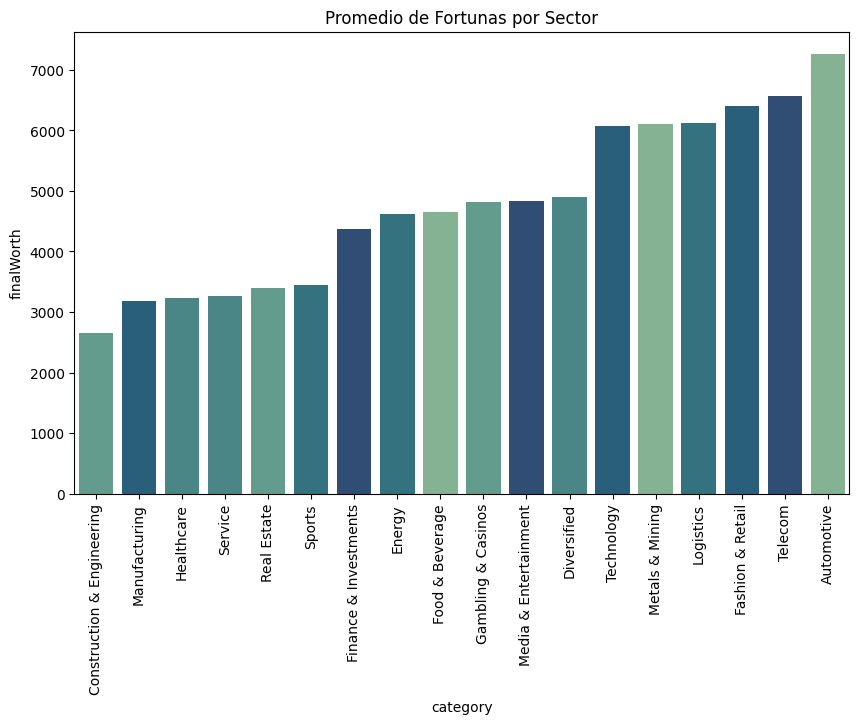

In [29]:
mean_by_category = df.groupby("category")["finalWorth"].mean().reset_index()

# Order the categories based on the mean of the continuous variable
order = mean_by_category.sort_values('finalWorth')['category']

# Generate a sequential green color palette
green_palette = sns.color_palette("crest")


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
fig = sns.barplot(x='category', y='finalWorth', data=mean_by_category, order=order, hue="category", palette=green_palette)

# Set the title
fig.set(title="Promedio de Fortunas por Sector")

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Display the plot
plt.show()

C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\695723393.py:12: UserWarning: 
The palette list has fewer values (6) than needed (18) and will cycle, which may produce an uninterpretable plot.
  fig = sns.barplot(x='category', y='finalWorth', data=mean_by_category, order=order, hue="category", palette=green_palette)


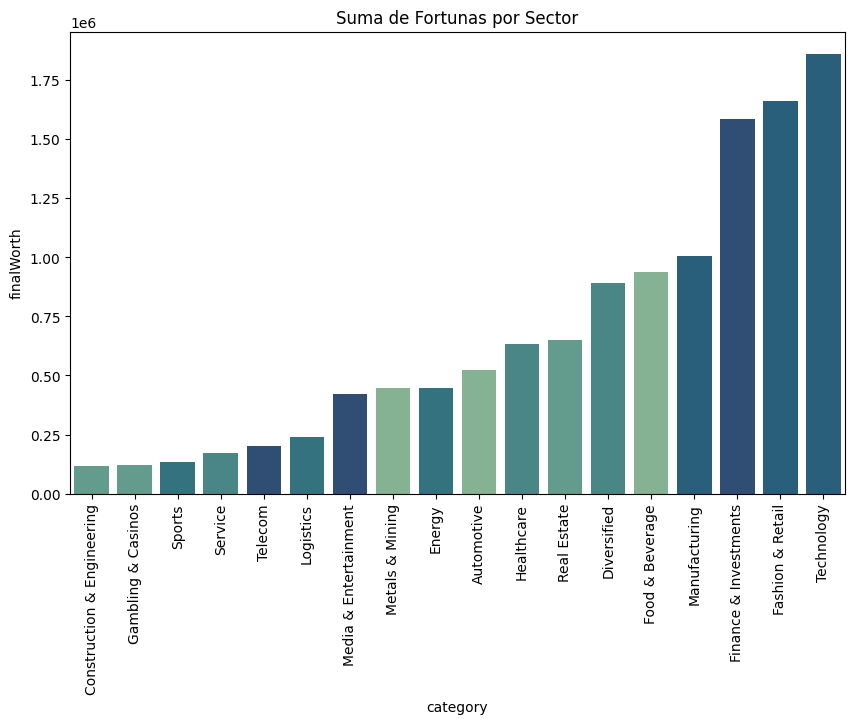

In [30]:
mean_by_category = df.groupby("category")["finalWorth"].sum().reset_index()

# Order the categories based on the mean of the continuous variable
order = mean_by_category.sort_values('finalWorth')['category']

# Generate a sequential green color palette
green_palette = sns.color_palette("crest")


# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
fig = sns.barplot(x='category', y='finalWorth', data=mean_by_category, order=order, hue="category", palette=green_palette)

# Set the title
fig.set(title="Suma de Fortunas por Sector")

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Conclusion 2
No hay una relacion entre los sectores con mas fortunas y los sectores con mayor promedio.

La diferencia se debe al uso de las funciones sum() y mean().


Si se utiliza promedio() se favorece a sectores con pocos integrantes.

La diferencia es visible en sectores como el de tecnologia:
Usando promedio() el sector tecnologico es el sexto.
Usando suma() el sector tecnologico tiene la mayor fortuna. Esto debido a outliers como Jeff Bezos, Elon Musk y Bill gates, excepciones que tienen 50 veces mas fortuna que la media.

No, el promedio de fortuna en el sector tecnologico no es el mayor.



## Hipotesis 3
H3: ¿Hay una diferencia significativa en la riqueza final de los multimillonarios entre diferentes países? Esta pregunta indagaría si el país de residencia (tomaremos como país donde las empresas “residen”) tiene un impacto en la riqueza acumulada de los multimillonarios.
Observaciones: seleccionen bien su cmap
Data:
Visualización: heatmap+choropletico (mapamundi con colores que representen la riqueza)



Se eliminan los siguiente paises. Tiene un alto promedio debido a que solo tienen uno o dos billonarios pero con una fortuna muy grande. Esto los hace sobresalir de la escala.

In [31]:
paises_a_eliminar = ['Colombia', 'Uzbekistan', 'Mexico', 'Nigeria']

# Eliminar filas con los países específicos
df4 = df[~df["country"].isin(paises_a_eliminar)]
# Group by 'country' and calculate the average finalWorth for each group
average_worth_per_country = df4.groupby('country')['finalWorth'].mean().reset_index()

In [32]:
# Group by 'country' and calculate the average finalWorth for each group
sum_worth_per_country = df.groupby('country')['finalWorth'].sum().reset_index()

Uso de go.Choropleth con codigos de paises. No lo utilizo porque encontre un metodo en el que no hay que modificar los paises a codigos.

In [33]:
"""
fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    # locationmode = "country names",
    z = df['finalWorth'],
    text = df['country'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'Billions US$',
    zmin=min(df['finalWorth']),
    zmax=max(df['finalWorth'])
))

fig.update_layout(
    title_text='Billionaires Final Net Worth',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: ',
        showarrow = False
    )]
)

fig.show()
"""

'\nfig = go.Figure(data=go.Choropleth(\n    locations = df[\'CODE\'],\n    # locationmode = "country names",\n    z = df[\'finalWorth\'],\n    text = df[\'country\'],\n    colorscale = \'Viridis\',\n    autocolorscale=False,\n    reversescale=True,\n    marker_line_color=\'darkgray\',\n    marker_line_width=0.5,\n    colorbar_tickprefix = \'$\',\n    colorbar_title = \'Billions US$\',\n    zmin=min(df[\'finalWorth\']),\n    zmax=max(df[\'finalWorth\'])\n))\n\nfig.update_layout(\n    title_text=\'Billionaires Final Net Worth\',\n    geo=dict(\n        showframe=False,\n        showcoastlines=False,\n        projection_type=\'equirectangular\'\n    ),\n    annotations = [dict(\n        x=0.55,\n        y=0.1,\n        xref=\'paper\',\n        yref=\'paper\',\n        text=\'Source: \',\n        showarrow = False\n    )]\n)\n\nfig.show()\n'

In [34]:
fig = px.choropleth(average_worth_per_country,
                    locations='country',
                    locationmode='country names',
                    color='finalWorth',
                    color_continuous_scale='Blues',
                    title='Paises Con Billonarios Con Mayor Fortuna Promedio',
                    labels={'value': 'Riqueza'})

# Show the plot
fig.show()

In [35]:
fig = px.choropleth(sum_worth_per_country,
                    locations='country',
                    locationmode='country names',
                    color='finalWorth',
                    color_continuous_scale='Greens',
                    title='Paises Con Billonarios Con Mayor Fortuna En Total',
                    labels={'value': 'Riqueza'})

# Show the plot
fig.show()

C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\2125495393.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\2125495393.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



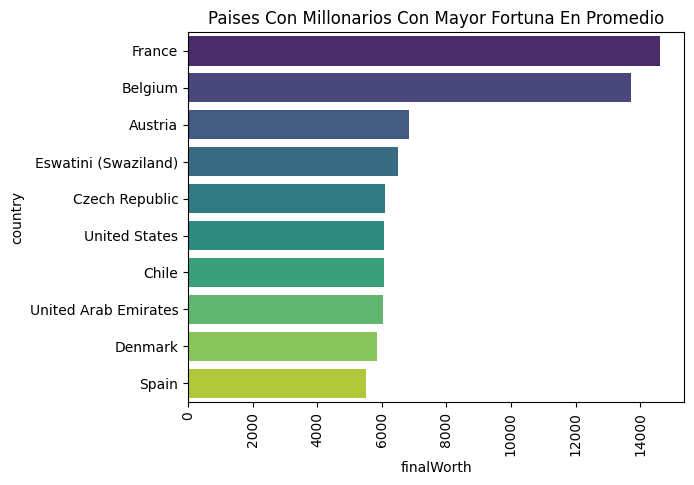

In [36]:
# Sort the DataFrame by the 'finalWorth' column in descending order
sorted_df = average_worth_per_country.sort_values(by='finalWorth', ascending=False)

# Select the top 10 values
top_10_df = sorted_df.head(10)

# Create a bar plot for the top 10 values
ax = sns.barplot(data=top_10_df, x="finalWorth", y="country", orient="h", palette="viridis")

# Customize the x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set(title='Paises Con Millonarios Con Mayor Fortuna En Promedio')

plt.show()

C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\1090101848.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User Dell\AppData\Local\Temp\ipykernel_18024\1090101848.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



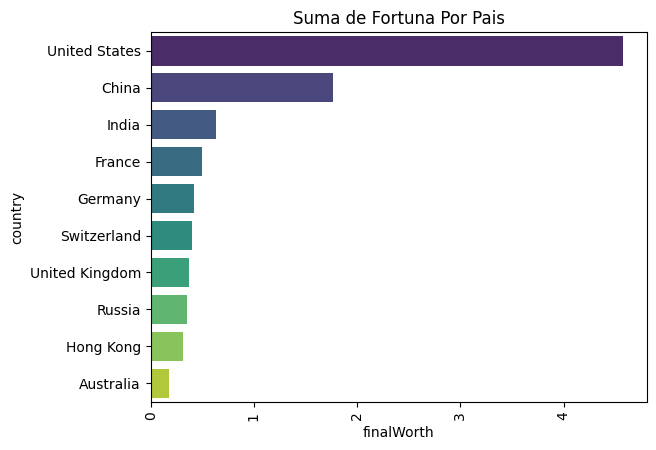

In [37]:
# Sort the DataFrame by the 'finalWorth' column in descending order
sorted_df = sum_worth_per_country.sort_values(by='finalWorth', ascending=False)

# Select the top 10 values
top_10_df = sorted_df.head(10)

# Create a bar plot for the top 10 values
ax = sns.barplot(data=top_10_df, x="finalWorth", y="country", orient="h", palette="viridis")

# Customize the x-axis labels to be vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title
ax.set(title="Suma de Fortuna Por Pais")

plt.show()

### Conclusion 3
Si, hay diferencia entre los paises.

No hay una relacion entre los paises con billonarios con mayor fortuna total y los paises con billonarios con mayor fortuna promedio.

La diferencia se debe al uso de las funciones sum() y mean().

Si se utiliza promedio() se favorece a sectores con pocos integrantes.

La diferencia es visible en paises como Uzbekistan, un unico billonario con 14 billion. Provocando una media de billonario en el pais muy alta.

Usando promedio() Francia es el pais con mayor fortuna por billonario.
Usando suma() el top es USA.

Se eliminaron outliers como Uzbekistan entre otro (explicado previamente).


## Hipotesis 4


H4: ¿La tasa de impuestos en el país de un multimillonario está inversamente relacionada con su riqueza final? Esta hipótesis exploraría si una menor tasa de impuestos en el país de un multimillonario está asociada con una mayor riqueza final.
Observaciones: investigar imputación y prunning
Data:
Visualización: scatter plot – línea de regresión lineal (no usar machine learning)

In [38]:
# Calculate the 25th percentile value
percentile_25 = df['finalWorth'].quantile(0.25)

# Calculate the 75th percentile value
percentile_75 = df['finalWorth'].quantile(0.75)

# Get the first 25 percentile (poorest)
poorest = df[df['finalWorth'] <= percentile_25]

# Get the last 25 percentile (richest)
richest = df[df['finalWorth'] >= percentile_75]

# Print the results
country_counts_p = poorest['country'].value_counts()
country_counts_r = richest['country'].value_counts()

richest_countries = country_counts_r.index
poorest_countries = country_counts_p.index

top_poorest = country_counts_p.index[:10]
top_richest = country_counts_r.index[:10]
set1 = set(richest_countries)
set2 = set(poorest_countries)
set3 = set(top_poorest)
set4 = set(top_richest)

# Find countries that do not repeat in the two Series
unique_countries = set1.symmetric_difference(set2)
unique_countries_top = set3.symmetric_difference(set4)
common_values = set1.intersection(set2)

# Get the count of common values
num_common_values = len(common_values)
num_unique_values = len(unique_countries)

# Print the result
print(f'Number of common values: {num_common_values}')
print(f'Countries that do not repeat: {num_unique_values}')
print(f'Top paises con los billonarios mas ricos: {top_richest}')
print(f'Top paises con los billonarios menos ricos: {top_poorest}')
print(f'Paises q no se repiten en los tops anteriores: {unique_countries_top}')


Number of common values: 41
Countries that do not repeat: 25
Top paises con los billonarios mas ricos: Index(['United States', 'China', 'Germany', 'India', 'Switzerland',
       'United Kingdom', 'Russia', 'Hong Kong', 'France', 'Canada'],
      dtype='object', name='country')
Top paises con los billonarios menos ricos: Index(['China', 'United States', 'India', 'Russia', 'Germany',
       'United Kingdom', 'Singapore', 'Italy', 'Brazil', 'Japan'],
      dtype='object', name='country')
Paises q no se repiten en los tops anteriores: {'Singapore', 'France', 'Switzerland', 'Canada', 'Japan', 'Italy', 'Brazil', 'Hong Kong'}


Tasa de Impuestos de los paises que no se repiten:

Mas ricos: Singapore (13.1), Italy (24.3), Brazil (14.2), Japan (11.9)

Mas pobres: Switzerland (10.1), Hong Kong (NA), France (24.2), Canada (12.8)

Nos damos cuenta que hay impuestos altos e impuestos bajos en ambos.

Mas ricos: Switzerland (703,082,435,360), Hong Kong (NA), France (2,715,518,274,227), Canada (1,736,425,629,520)

Mas pobres: Singapore (372,062,527,489), Italy (2,001,244,392,042), Brazil (1,839,758,040,766), Japan (5,081,769,542,380)

Nos damos cuenta que hay impuestos altos e impuestos bajos en ambos.

No hay una relacion entre los billonarios mas ricos y el impuesto de su pais de residencia. Es decir q no importa el porcentaje para ganar dinero.


Numero de billonarios dependiendo del impuesto

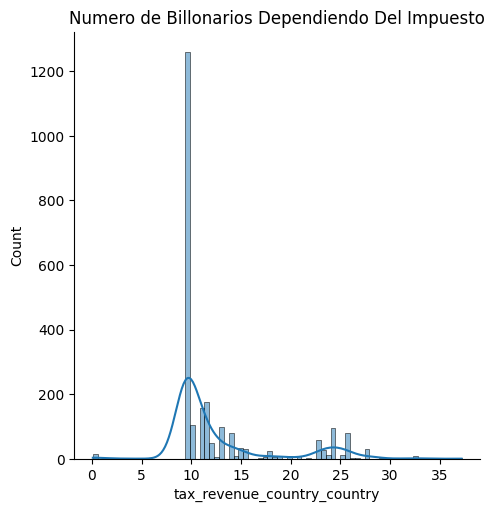

In [39]:
fig = sns.displot(df['tax_revenue_country_country'], kde=True)
fig.set(title="Numero de Billonarios Dependiendo Del Impuesto")

Con escala logaritmica

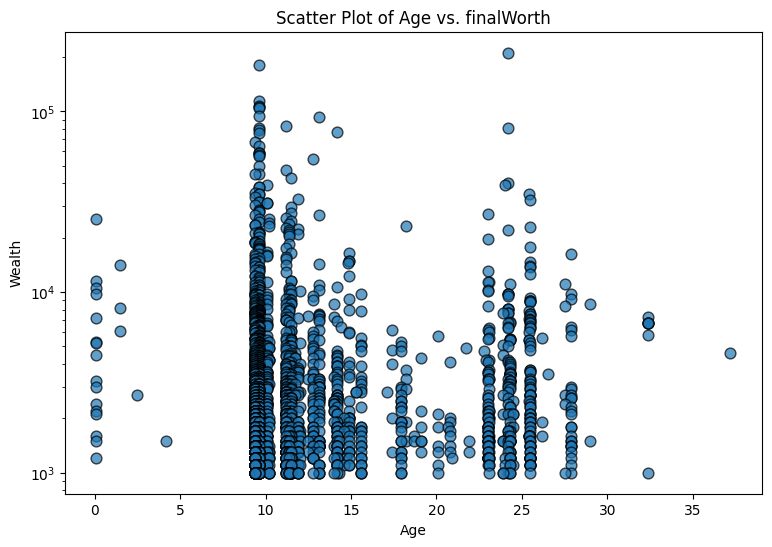

In [40]:
fig, ax = plt.subplots(figsize=(9, 6))

# Scatter plot using Matplotlib
ax.scatter(df['tax_revenue_country_country'], df['finalWorth'], s=60, alpha=0.7, edgecolors="k")

# sns.scatterplot(h)

# Set logarithmic scale on both variables in Matplotlib
#ax.set_xscale("log")
ax.set_yscale("log")

# Set labels and title using Matplotlib
ax.set_xlabel('Age')
ax.set_ylabel('Wealth')
ax.set_title('Scatter Plot of Age vs. finalWorth')

# Show the Matplotlib plot
plt.show()

Con el df original

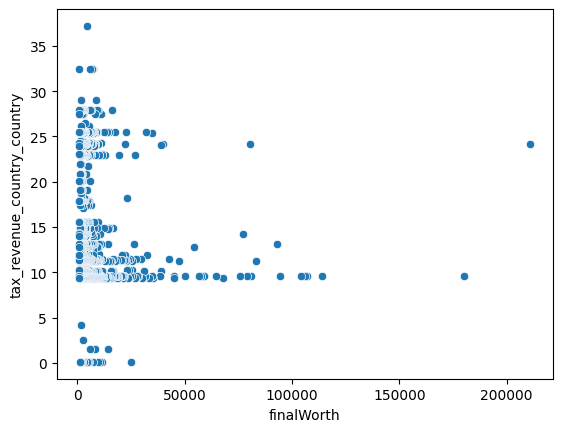

In [41]:
# Con el df original

sns.scatterplot(x="finalWorth", y="tax_revenue_country_country", data=df)
plt.xlabel= "gdp"
plt.ylabel= 'finalWorth'
plt.title= 'gdp vs net worth'
plt.show()

Con el df sin outliers

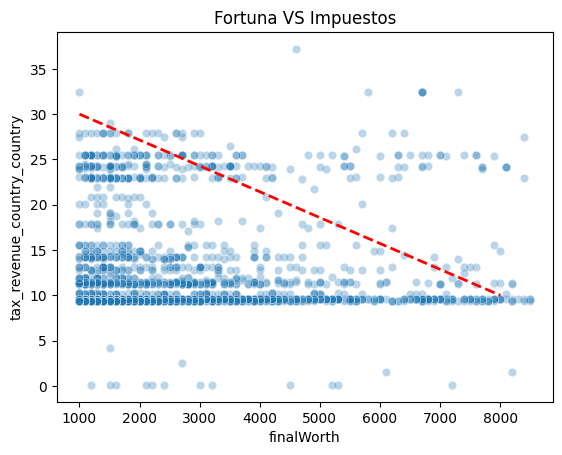

In [42]:
# Con el df sin outliers

fig = sns.scatterplot(x="finalWorth", y="tax_revenue_country_country", data=filtered_df, alpha=0.3)

# Draw a line above the scatter plot
plt.plot([1000, 8000], [30, 10], color='red', linestyle='--', linewidth=2)

fig.set(title='Fortuna VS Impuestos')

plt.show()

### Conclusion 4
Hay una relacion entre la fortuna de los billonarios y los impuestos.

Conforme aumentan los impuestos, el numero y la fortuna de los millonarios se reduce. La linea graficada marca una division para los datos, no la sobrepasan.

Justamente Estados Unidos tiene 9.6 de impuestos (base del triangulo), donde se encuentran en mayor numero y con mayor fortuna los billonarios.

## Hipotesis 5

¿El gdp_country en el país de un multimillonario está correlacionada con su riqueza final? Esta hipótesis investigaría si hay una relación entre la riqueza final de los multimillonarios el bienestar económico del país. Será que entre mejor le va a los millonarios mejor le va al país??
Observaciones:
Data:
Visualización: scatter plot – línea de regresión lineal (no usar machine learning)


Hacer division por grupos de los dos ultimos analisis.
Son los paises excluyentes? No muchos.
Rango de valores de taxes.
Grupos de paises por taxes y que no se mezclen. Con scatter plot
Buscar una relacion una conclusion, que de positivo puede haber q no
haya una relacion entre la riqueza de los ricos y el bienestar del pais.

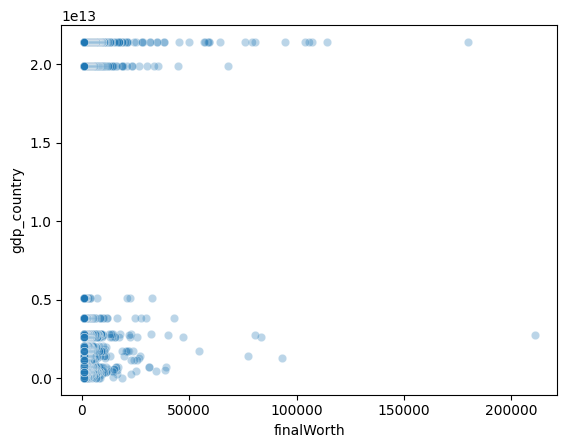

In [43]:
# Cambiar la columna nombre de gdp a PIB
sns.scatterplot(y="gdp_country", x="finalWorth", data=df, alpha=0.3)  # Swapped x and y
plt.xlabel="Net Worth"  # Updated label for x-axis
plt.ylabel="GDP"  # Updated label for y-axis
plt.title="Net Worth vs GDP"  # Updated title

plt.show()

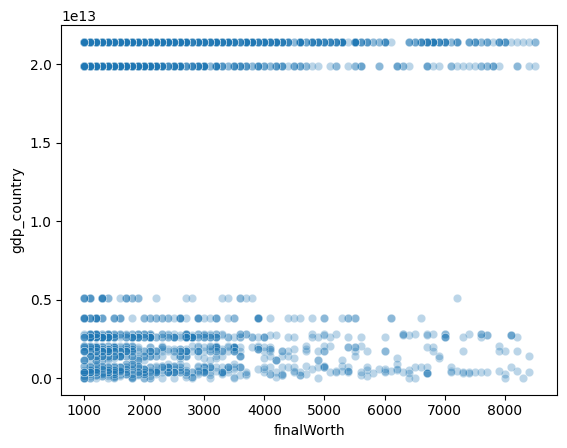

In [44]:
sns.scatterplot(y="gdp_country", x="finalWorth", data=filtered_df, alpha=0.3)  # Swapped x and y

plt.show()

Se hace una separacion en 1.5e13 porque en esa marca de gdp existe una division clara.

In [45]:
# Define a threshold for categorizing GDP as 'high' or 'low'
gdp_threshold = 1.5e13  # Adjust this threshold based on your data

# Create two separate DataFrames based on the GDP threshold
df_high_gdp = df[df['gdp_country'] >= gdp_threshold]
df_low_gdp = df[df['gdp_country'] < gdp_threshold]

# Now df_high_gdp contains rows where GDP is high, and df_low_gdp contains rows where GDP is low

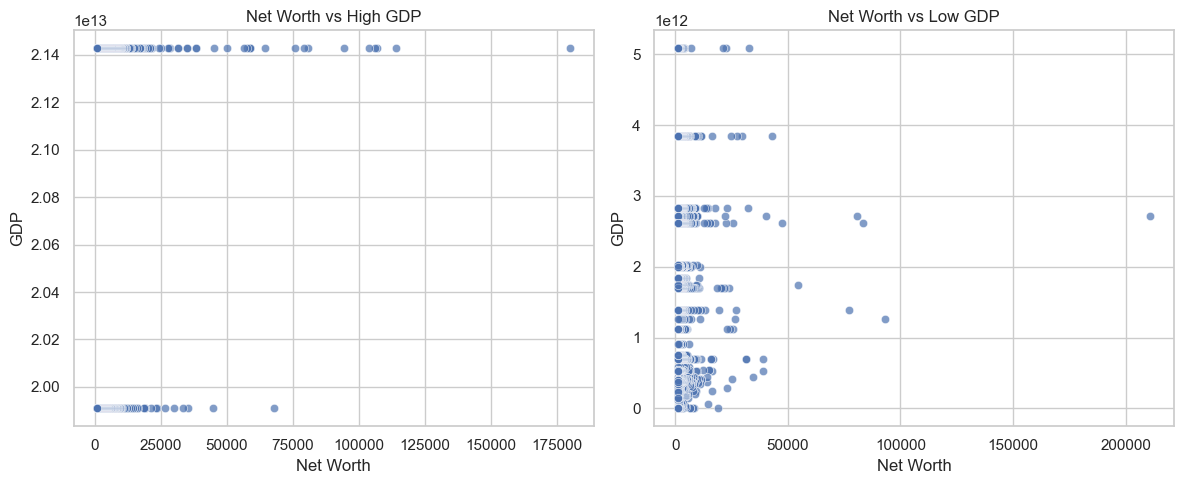

In [46]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for high GDP
sns.scatterplot(x="finalWorth", y="gdp_country", data=df_high_gdp, alpha=0.7, ax=axes[0])
axes[0].set_xlabel("Net Worth")
axes[0].set_ylabel("GDP")
axes[0].set_title("Net Worth vs High GDP")

# Plot for low GDP
sns.scatterplot(x="finalWorth", y="gdp_country", data=df_low_gdp, alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Net Worth")
axes[1].set_ylabel("GDP")
axes[1].set_title("Net Worth vs Low GDP")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [47]:
print(f'El numero de elementos con gdp mayor que 1.5e13 es: {len(df_high_gdp)}')
print(f'El numero de elementos con gdp menor que 1.5e13 es: {len(df_low_gdp)}')

print(f'La riqueza total de los elementos con gdp mayor que 1.5e13 es: {df_high_gdp["finalWorth"].sum()}')
print(f'La riqueza total de los elementos con gdp menor que 1.5e13 es: {df_low_gdp["finalWorth"].sum()}')
print(f'La riqueza promedio de los elementos con gdp mayor que 1.5e13 es: {df_high_gdp["finalWorth"].mean()}')
print(f'La riqueza promedio de los elementos con gdp menor que 1.5e13 es: {df_low_gdp["finalWorth"].mean()}')

El numero de elementos con gdp mayor que 1.5e13 es: 1258
El numero de elementos con gdp menor que 1.5e13 es: 1169
La riqueza total de los elementos con gdp mayor que 1.5e13 es: 6345500
La riqueza total de los elementos con gdp menor que 1.5e13 es: 5166400
La riqueza promedio de los elementos con gdp mayor que 1.5e13 es: 5044.117647058823
La riqueza promedio de los elementos con gdp menor que 1.5e13 es: 4419.50384944397


Con toda esa informacion nos podemos dar cuenta que los elementos con PIB alto son mas abundante, tienen mayor riqueza total y mayor riqueza promedio que los elementos con PIB

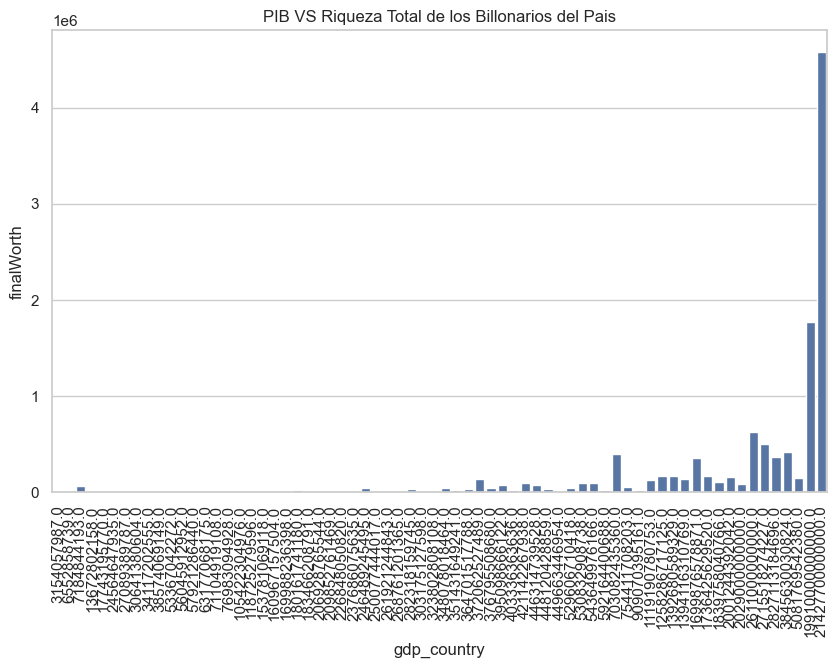

In [48]:
mean_by_country = df.groupby("gdp_country")["finalWorth"].sum().reset_index()

# Order the categories based on the mean of the continuous variable
# order = mean_by_country.sort_values('finalWorth')['gdp_country']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
fig = sns.barplot(x='gdp_country', y='finalWorth', data=mean_by_country)

# Set the title
fig.set(title='PIB VS Riqueza Total de los Billonarios del Pais')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Display the plot
plt.show()


Sera que entre mejor le va a los millonarios mejor le va al pais

### Conclusion 5
El PIB de los billonarios esta fuertemente divido entre valores inferiores y superiores a 1.5e13, no hay valores intermedios.

Analizamos las diferencias entre los dos grupos. Nos damos cuenta que en el grupo con mas PIB hay mayor numero, con mas riqueza total y riqueza promedio de billonarios.

# Referencias



1.   Otro EDA del mismo dataset:
https://www.kaggle.com/code/nitinchoudhary012/data-analysis-forbes-billionaires-detailed-eda
2.   El dataset:
https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset
3. Informacion para EDA:
https://skveliz-55.notion.site/EDA-0175c4ce59e94193ab8022c6dadddb39?pvs=4
4. Videos para aprender:
https://www.youtube.com/playlist?list=PLpbq6hOC7kG7ONH1oDaf7Qwk_Bq4L7DuU
5. Como disminuir la densidad:
https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
6. Como crear una distribucion:
https://www.statology.org/seaborn-normal-distribution/
7. Analisis del gdp: https://www.bbc.com/mundo/noticias-64394078#:~:text=Puede%20ser%20que%20en%20algunos,de%20bienestar%2C%20desarrollo%20o%20%C3%A9xito.



